In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import joblib as jl

In [6]:
dig=load_digits()
for key in dig:
    print(key)

data
target
target_names
images
DESCR


In [13]:
num_df=pd.DataFrame(dig.data)

In [15]:
num_df['target']=dig.target

In [20]:
rows,cols=num_df.shape
print('Rows:',rows)
print('Columns:',cols)

Rows: 1797
Columns: 65


In [21]:
x_data,y_data=num_df[num_df.columns[0:64]],num_df[num_df.columns[64]]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)

In [25]:
print('--Sizes---')
print('X-train:',x_train.shape)
print('Y-train:',y_train.shape)
print('X-test:',x_test.shape)
print('Y-test:',y_test.shape)

--Sizes---
X-train: (1437, 64)
Y-train: (1437,)
X-test: (360, 64)
Y-test: (360,)


## Digit visualiation


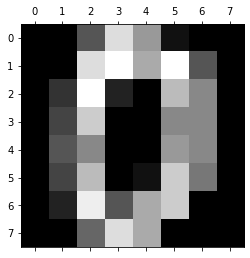

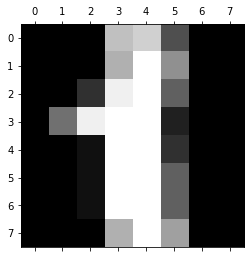

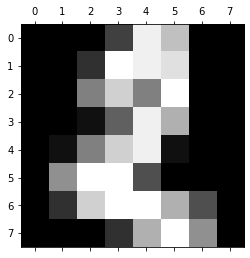

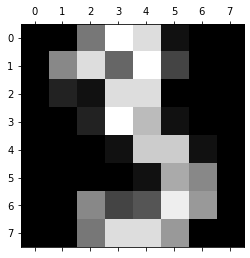

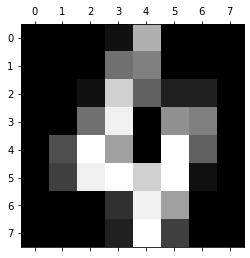

In [64]:
for i in range(5):
    plt.matshow(dig.images[i])

In [32]:
model=SVC( kernel='linear')
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
model.score(x_test,y_test)

0.9805555555555555

In [35]:
jl.dump(model,'dig_model')

['dig_model']

In [36]:
dig_model=jl.load('dig_model')

In [39]:
predicted=dig_model.predict(x_test)

In [56]:
result_matrix=confusion_matrix(predicted,y_test)

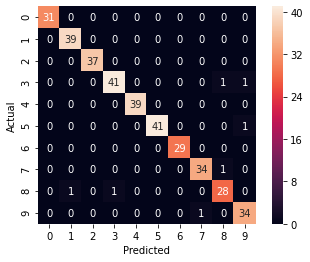

In [42]:
sns.heatmap(result_matrix,annot=True,cbar=True,square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()